### Beschreibung des Datensatzes

1. CCSDS_OMM_VERS: Version des CCSDS-Orbitalparameter-Datensatzes
2. COMMENT: Kommentar
3. CREATION_DATE: Erstellungsdatum des Datensatzes
4. ORIGINATOR: Urheber des Datensatzes
5. OBJECT_NAME: Name des Objekts
6. OBJECT_ID: Objekt-ID
7. CENTER_NAME: Name des Zentrums (in diesem Fall die Erde)
8. REF_FRAME: Referenzrahmen
9. TIME_SYSTEM: Zeitmesssystem
10. MEAN_ELEMENT_THEORY: Mittlere Elementtheorie
11. EPOCH: Zeitpunkt des Epoche
12. MEAN_MOTION: Mittlere Bewegung
13. ECCENTRICITY: Exzentrizität
14. INCLINATION: Neigung
15. RA_OF_ASC_NODE: Aufsteigender Knoten
16. ARG_OF_PERICENTER: Argument des Perizentrums
17. MEAN_ANOMALY: Mittlere Anomalie
18. EPHEMERIS_TYPE: Ephemeris-Typ
19. NORAD_CAT_ID: NORAD Katalog-ID
20. ELEMENT_SET_NO: Elementensatznummer
21. REV_AT_EPOCH: Anzahl der Umläufe an der Epoche
22. BSTAR: B-Star Term
23. MEAN_MOTION_DOT: Änderung der mittleren Bewegung pro Tag
24. MEAN_MOTION_DDOT: Änderung der mittleren Bewegung pro Tag²
25. SEMIMAJOR_AXIS: Halbachse
26. PERIOD: Umlaufzeit
27. APOAPSIS: Apoapsis
28. PERIAPSIS: Periapsis
29. OBJECT_TYPE: Objekttyp
30. RCS_SIZE: RCS-Größe
31. COUNTRY_CODE: Ländercode
32. LAUNCH_DATE: Startdatum
33. SITE: Startplatz
34. DECAY_DATE: Verfallsdatum
35. FILE: Dateiname
36. GP_ID: GP-ID
37. TLE_LINE0: TLE Zeile 0
36. TLE_LINE1: TLE Zeile 1
39. TLE_LINE2: TLE Zeile 2

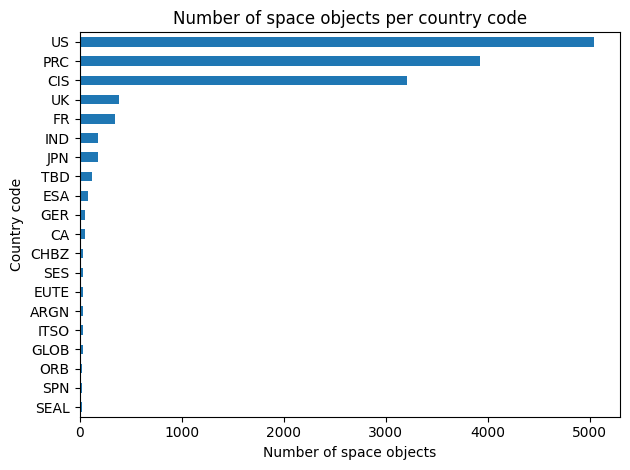

In [117]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('space_decay.csv')

# plot number of space objects per country_code only for the top 10 countries
# df['COUNTRY_CODE'].value_counts(ascending=True).tail(20).plot(kind='barh')

df['COUNTRY_CODE'].value_counts(ascending=True).tail(20).plot(kind='barh')
plt.xlabel('Number of space objects')
plt.ylabel('Country code')
plt.title('Number of space objects per country code')
plt.tight_layout()
plt.show()

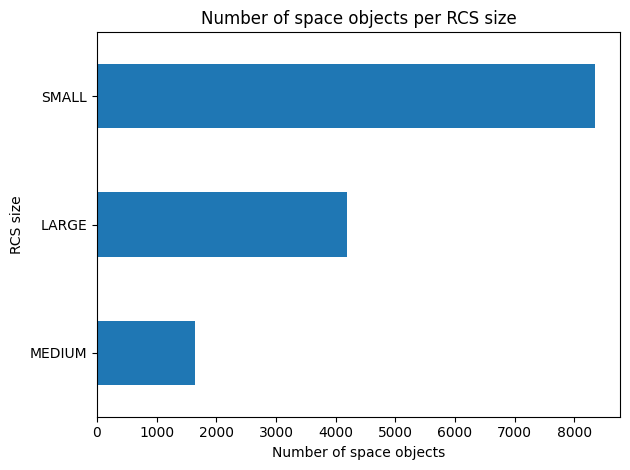

In [118]:
df['RCS_SIZE'].value_counts(ascending=True).plot(kind='barh')
plt.xlabel('Number of space objects')
plt.ylabel('RCS size')
plt.title('Number of space objects per RCS size')
plt.tight_layout()
plt.show()

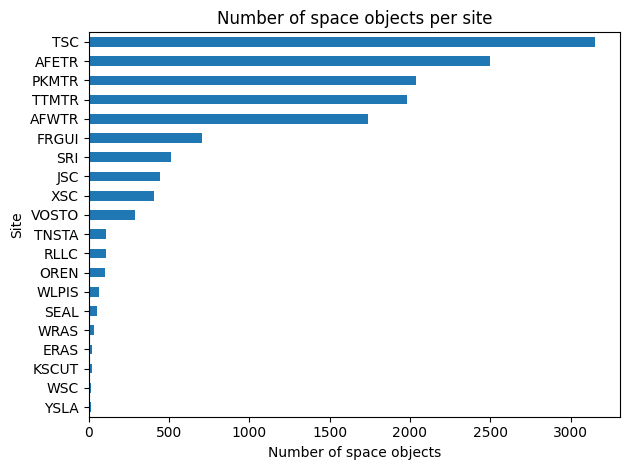

In [119]:
df['SITE'].value_counts(ascending=True).tail(20).plot(kind='barh')
plt.xlabel('Number of space objects')
plt.ylabel('Site')
plt.title('Number of space objects per site')
plt.tight_layout()
plt.show()

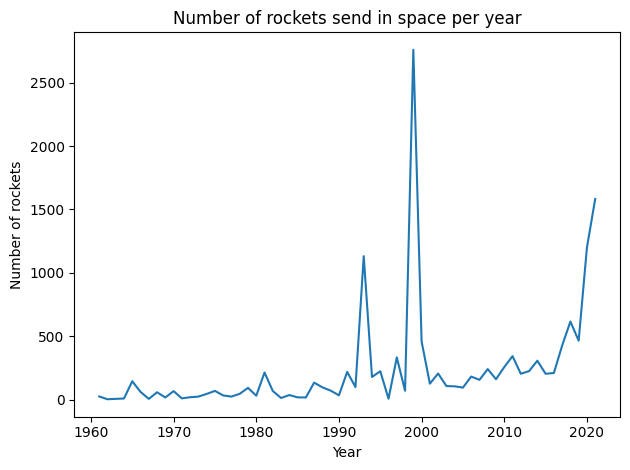

In [120]:

# no bar chart but commulative sum of rockets send in space per year
df['LAUNCH_DATE'].value_counts().sort_index().plot()
plt.xlabel('Year')
plt.ylabel('Number of rockets')
plt.title('Number of rockets send in space per year')
plt.tight_layout()
plt.show()

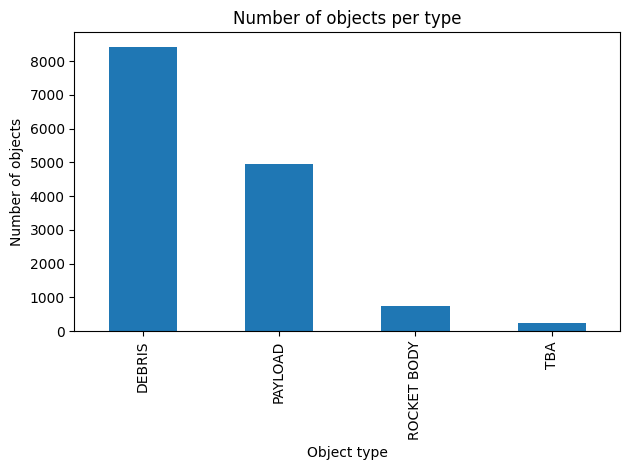

In [121]:
# OBJECT_TYPE show DEBRIS compared to no DEBRIS
df['OBJECT_TYPE'].value_counts().plot(kind='bar')
plt.xlabel('Object type')
plt.ylabel('Number of objects')
plt.title('Number of objects per type')
plt.tight_layout()
plt.show()

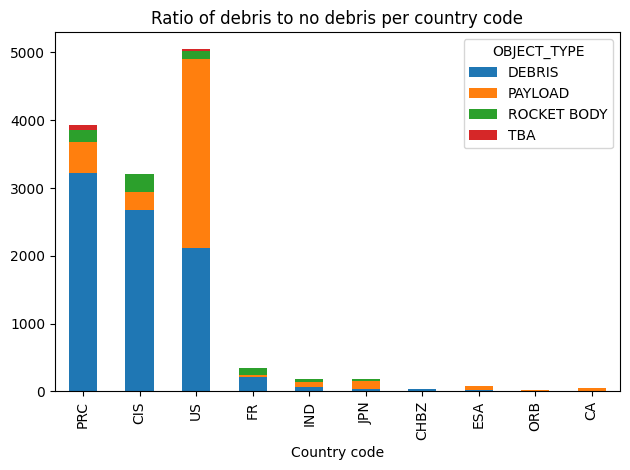

In [122]:
# show ratio of debris to no debris for each COUNTRY_CODE
df.groupby('COUNTRY_CODE')['OBJECT_TYPE'].value_counts().unstack().dropna(axis=1, how="all").sort_values(by=["DEBRIS"], ascending=False).head(10).plot(kind='bar', stacked=True)
# only 20 countries with the most space objects
plt.xlabel('Country code')
# plt.ylabel('Ratio of objects')
plt.title('Ratio of debris to no debris per country code')
plt.tight_layout()
plt.show()

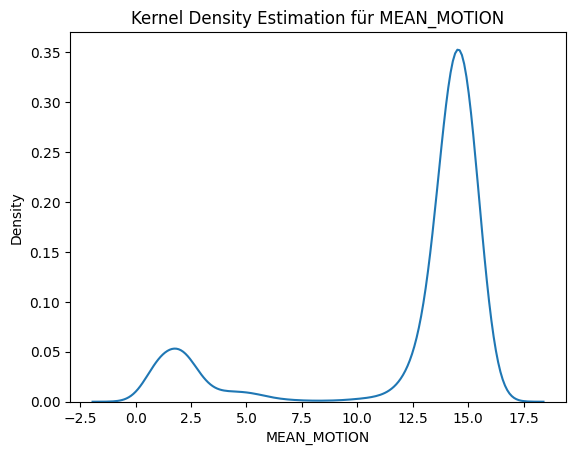

In [123]:
import seaborn as sns

sns.kdeplot(data=df['MEAN_MOTION'])
plt.title('Kernel Density Estimation für MEAN_MOTION')
plt.xlabel('MEAN_MOTION')
plt.ylabel('Density')
plt.show()

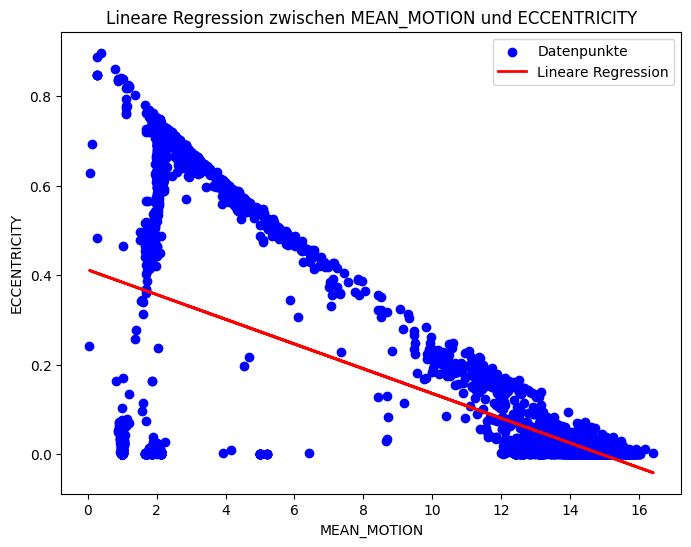

Regressionskoeffizient (Steigung): -0.027657381903125076
Regressionskonstante (Y-Achsenabschnitt): 0.4118850768488335


In [124]:
from scipy.stats import linregress

# Lineare Regression
slope, intercept, r_value, p_value, std_err = linregress(df['MEAN_MOTION'], df['ECCENTRICITY'])

# Plot der Daten und der Regressionsgeraden
plt.figure(figsize=(8, 6))
plt.scatter(df['MEAN_MOTION'], df['ECCENTRICITY'], color='blue', label='Datenpunkte')
plt.plot(df['MEAN_MOTION'], slope * df['MEAN_MOTION'] + intercept, color='red', linewidth=2, label='Lineare Regression')
plt.title('Lineare Regression zwischen MEAN_MOTION und ECCENTRICITY')
plt.xlabel('MEAN_MOTION')
plt.ylabel('ECCENTRICITY')
plt.legend()
plt.show()

# Druck der Regressionskoeffizienten
print("Regressionskoeffizient (Steigung):", slope)
print("Regressionskonstante (Y-Achsenabschnitt):", intercept)


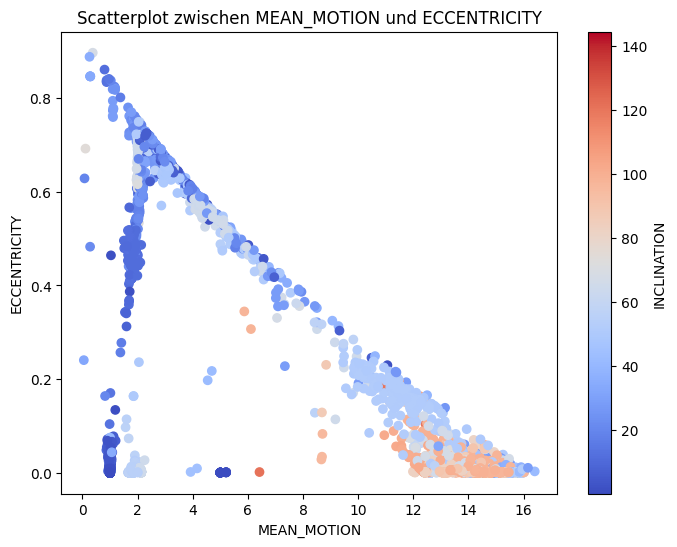

In [125]:
# Scatterplot mit Farbverlauf
plt.figure(figsize=(8, 6))
plt.scatter(df['MEAN_MOTION'], df['ECCENTRICITY'], c=df['INCLINATION'], cmap='coolwarm')
plt.title('Scatterplot zwischen MEAN_MOTION und ECCENTRICITY')
plt.xlabel('MEAN_MOTION')
plt.ylabel('ECCENTRICITY')
plt.colorbar(label='INCLINATION')
plt.show()


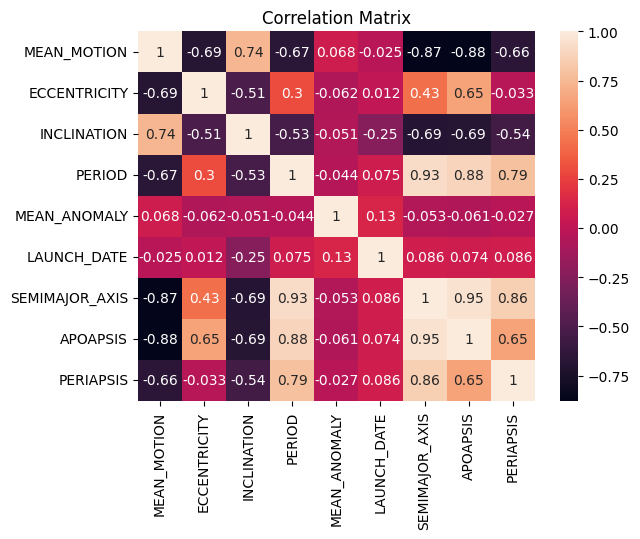

In [126]:
numeric_df = df.select_dtypes(include='number')
numeric_df = numeric_df[['MEAN_MOTION', 'ECCENTRICITY', 'INCLINATION', 'PERIOD', 'MEAN_ANOMALY', 'LAUNCH_DATE', 'SEMIMAJOR_AXIS', 'APOAPSIS', 'PERIAPSIS']]
corr = numeric_df.corr()
sns.heatmap(corr, annot=True)
plt.title('Correlation Matrix')
plt.show()